# Predicción de datos EEG contaminados con EOG

En este proyecto, se entrena una red neuronal para predecir datos EEG contaminados con EOG utilizando la técnica de eliminación de artefactos utilizando redes neuronales (Feed Forward). Se utilizarán 10 archivos numpy que contienen los datos EEG contaminados con EOG a diferentes niveles de decibelios.

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.regularizers import l1, l2
from keras.layers import Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

Se consideran 10 bases de datos con niveles de SNR variados entre -7 dB y 2 dB

In [2]:
filenames = [f"data/EEG_contaminated_with_EMG/EEG_contaminated_with_EMG_{i}db.npy" for i in range(-7, 3)]

corrs = []

Los datos se contrastaran siempre con la misma base de datos 'x'  pero variando las bases de datos contaminadas en y, posteriormente los datos se dividen en grupos de entrenamiento y validacion de una proporcion 1:10.

El modelo que mejor resultado ha sido con la configuracion de 1 capa oculta (512, 256, 512), iterando por 300 epocas con batches de 32 de tamaño

In [3]:
x = np.load('data/EEG_all_epochs.npy')
print(x.shape)
y = np.load(filenames[1])
print(y.shape)

(4514, 512)
(4514, 512)


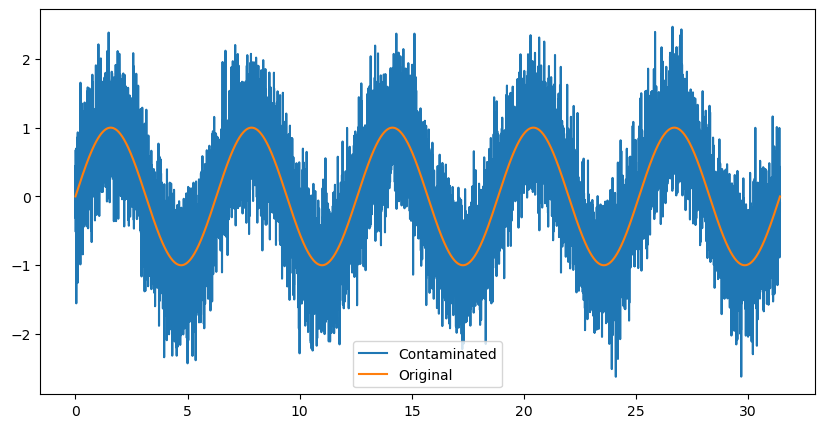

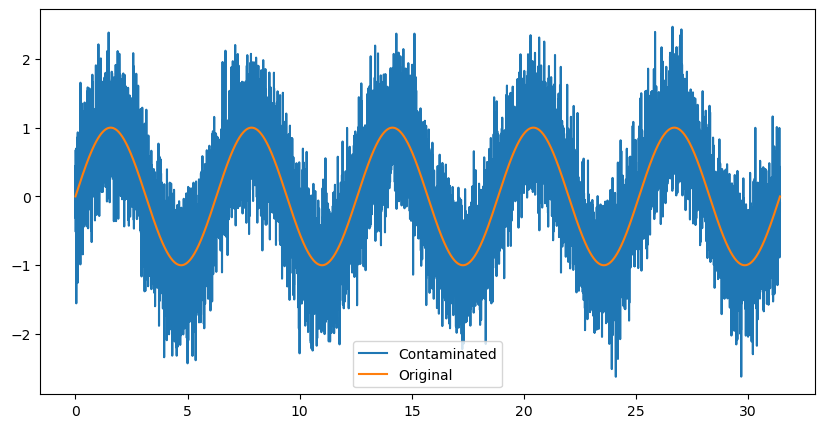

In [4]:
# Samples 
N = 10000

# Sin wave
t = np.linspace(0, 10*np.pi, N)
original_signal = np.sin(t)

# Noisy sin wave
noise = np.random.normal(0, 0.5, N)
contaminated_signal = original_signal + noise

plt.figure(figsize=(10,5))
plt.plot(t, contaminated_signal, label="Contaminated")
plt.plot(t, original_signal, label="Original")
plt.legend()
plt.show()

# Reshape the data
original_signal = original_signal.reshape(-1, 1)
contaminated_signal = contaminated_signal.reshape(-1, 1)

plt.figure(figsize=(10,5))
plt.plot(t, contaminated_signal, label="Contaminated")
plt.plot(t, original_signal, label="Original")
plt.legend()
plt.show()

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(contaminated_signal, original_signal, test_size=0.1, random_state=42)

In [10]:
# Create the model
model = Sequential()

# First Dense layer with L1 regularization
model.add(Dense(1024, input_dim=512, activation='relu', kernel_regularizer=l1(0.0001)))
model.add(Dropout(0.2))

# Second Dense layer with L2 regularization
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))

# Third Dense layer with L1 regularization
model.add(Dense(256, activation='relu', kernel_regularizer=l1(0.0001)))
model.add(Dropout(0.2))

# Fourth Dense layer with L1 regularization
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.0001)))

model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
563/563 [==============================] - 5s 7ms/step - loss: 0.3130
Epoch 2/100
563/563 [==============================] - 4s 7ms/step - loss: 0.1845
Epoch 3/100
563/563 [==============================] - 4s 7ms/step - loss: 0.1717
Epoch 4/100
563/563 [==============================] - 4s 7ms/step - loss: 0.1685
Epoch 5/100
563/563 [==============================] - 4s 7ms/step - loss: 0.1664
Epoch 6/100
563/563 [==============================] - 4s 7ms/step - loss: 0.1648
Epoch 7/100
563/563 [==============================] - 4s 7ms/step - loss: 0.1632
Epoch 8/100
563/563 [==============================] - 4s 8ms/step - loss: 0.1633
Epoch 9/100
563/563 [==============================] - 4s 7ms/step - loss: 0.1635
Epoch 10/100
563/563 [==============================] - 4s 7ms/step - loss: 0.1634
Epoch 11/100
563/563 [==============================] - 4s 7ms/step - loss: 0.1632
Epoch 12/100
563/563 [==============================] - 4s 7ms/step - loss: 0.1628
Epoch 13/100


Finalmente se evalua la red neuronal con el metodo del coeficiente de correlacion entre la base de datos 'x' y los diferentes 'y' que se testearon, sin embargo, los resultados obtenidos muestran un bajo rendimiento de este tipo de red neuronal, puesto que se testearon diferentes optimizadores, configuraciones y distintos hiperparamtros. Se observa un decenso especialmente alto en cuanto mas sucia esta la señal.

Finalmente se guardan los datos de evaluacion para todos los niveles de contaminacion que se crearon artificialmente en un archivo 'corrs.txt'

32/32 [==============================] - 0s 2ms/step


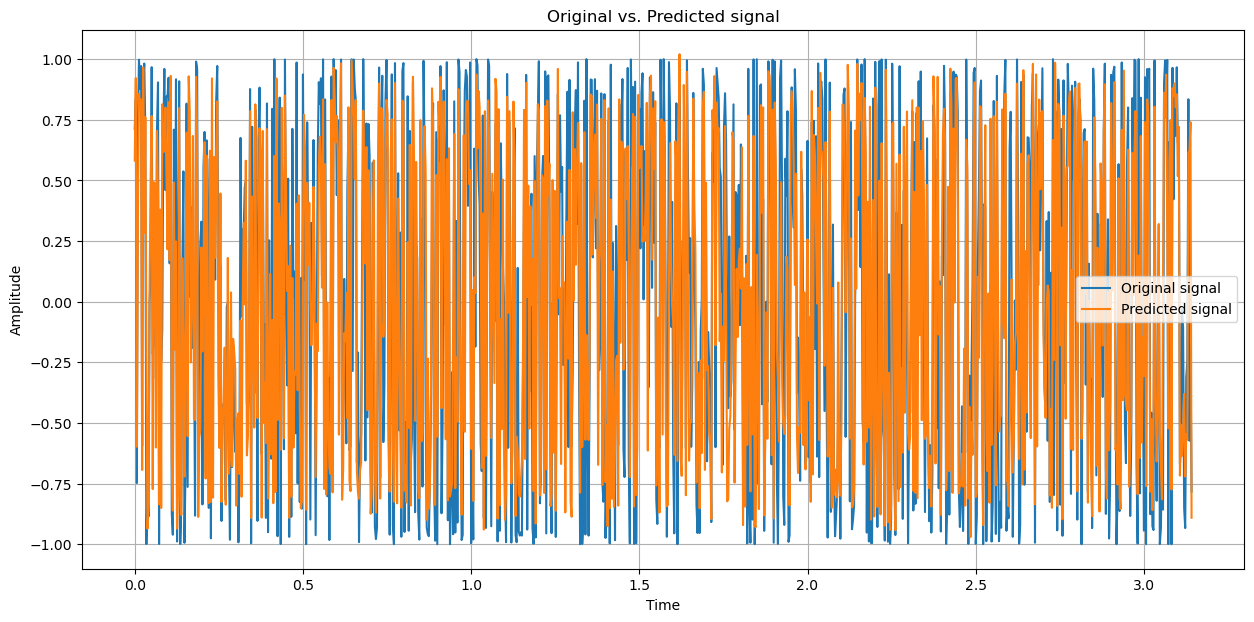

In [14]:
# Realizar las predicciones en el conjunto de validación
y_pred = model.predict(x_val)

# Create a time vector for plotting
t_val = np.linspace(0, 2*np.pi, len(y_val))

# Plot original and predicted signals
plt.figure(figsize=(15,7))
plt.plot(t_val, y_val, label='Original signal')
plt.plot(t_val, y_pred, label='Predicted signal')
plt.title('Original vs. Predicted signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
#np.savetxt('corrs_sig3_B16.txt', corrs)

#TODO: Cambiar activacion sigmoide por activacion relu, actualizar resultados en tabla de conveniencia 
#TODO: Cambiar activacion sigmoide por tanH, actualizar resultados en tabla de conveniencia

# Prueba 1 (10/05): Cambio en las capas mas simples por activacion 'sigmoide' y reduccion en el tamaño del bash, pruebas en: 'corrs_sig1_B16.txt'
# Prueba 2 (10/05): Cambio en todas las capas en activacion 'sigmoide'